In [1]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt

# Download NLTK data files
nltk.download('vader_lexicon')

# Load the dataset
data = pd.read_csv('RU_post.csv')

# Data preprocessing
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

data['clean_post'] = data['post'].apply(preprocess_text)
data


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/weichen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,post,time,clean_post
0,Marching in London today. End Israel’s occupat...,2024/3/30,marching london today end israels occupation p...
1,Russia invading Ukraine!,2024/3/30,russia invading ukraine
2,Russia Amps Up Online Campaign Against Ukraine...,2024/3/30,russia amps online campaign ukraine us electio...
3,"""Russia cannot defeat Ukraine or the West - an...",2024/3/30,russia defeat ukraine west likely lose west mo...
4,Ukraine will retreat if the US doesn’t give fi...,2024/3/30,ukraine retreat us doesnt give financial suppo...
...,...,...,...
95,We will win this,2022/3/11,win
96,No peace to ukraine,2022/2/26,peace ukraine
97,This is how Russia is planning to attack Ukrai...,2022/2/26,russia planning attack ukraine using people ki...
98,This is so scary watching this I can’t imagine...,2022/2/25,scary watching cant imagine people ukraine fee...


In [2]:
# Sentiment analysis
sid = SentimentIntensityAnalyzer()
data['sentiment'] = data['clean_post'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Classify sentiment as positive, negative, or neutral
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment_class'] = data['sentiment'].apply(classify_sentiment)

# Aggregate sentiment scores over time
sentiment_over_time = data.groupby('time')['sentiment'].mean()

# Display general trends and sentiment analysis results
print(data.head())
print(sentiment_over_time.head())

                                                post       time  \
0  Marching in London today. End Israel’s occupat...  2024/3/30   
1                          Russia invading  Ukraine!  2024/3/30   
2  Russia Amps Up Online Campaign Against Ukraine...  2024/3/30   
3  "Russia cannot defeat Ukraine or the West - an...  2024/3/30   
4  Ukraine will retreat if the US doesn’t give fi...  2024/3/30   

                                          clean_post  sentiment  \
0  marching london today end israels occupation p...    -0.2960   
1                            russia invading ukraine     0.0000   
2  russia amps online campaign ukraine us electio...     0.1531   
3  russia defeat ukraine west likely lose west mo...    -0.3400   
4  ukraine retreat us doesnt give financial suppo...    -0.5037   

  sentiment_class  
0        Negative  
1         Neutral  
2        Positive  
3        Negative  
4        Negative  
time
2022/11/11    0.700300
2022/11/9     0.310750
2022/2/25    -0.202100


In [3]:
# Save processed data
data.to_csv('processed_data.csv', index=False)

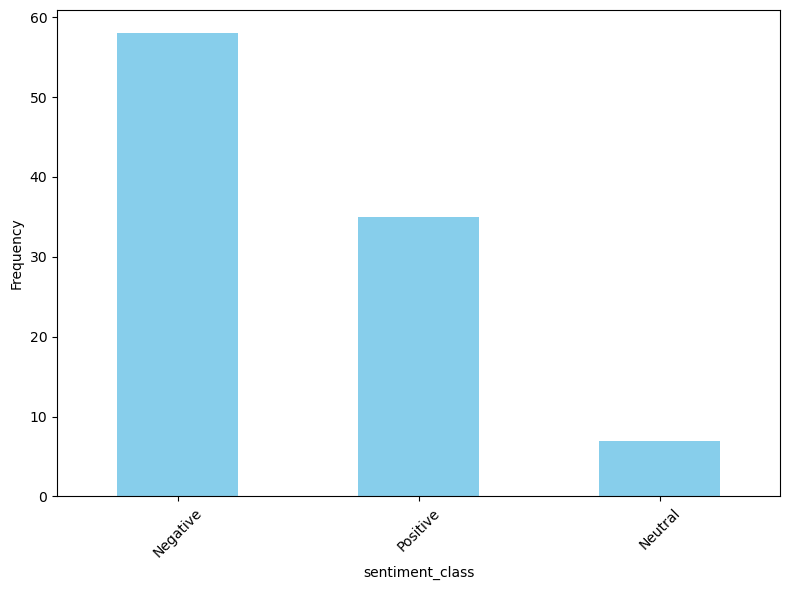

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the processed data
data = pd.read_csv('processed_data.csv')

# Count the frequencies of each sentiment category
sentiment_counts = data['sentiment_class'].value_counts()

# Plot the frequencies
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
# plt.title('Sentiment Category Frequencies')
# plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.savefig('sentiment_category_frequencies.png')
plt.show()


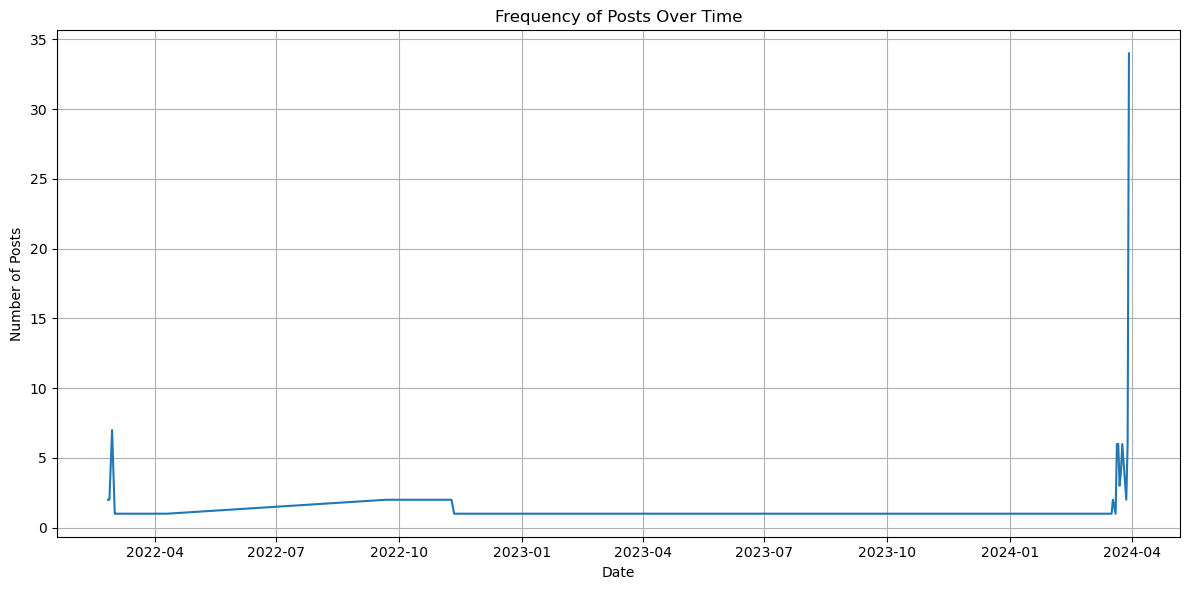

<Figure size 1000x600 with 0 Axes>

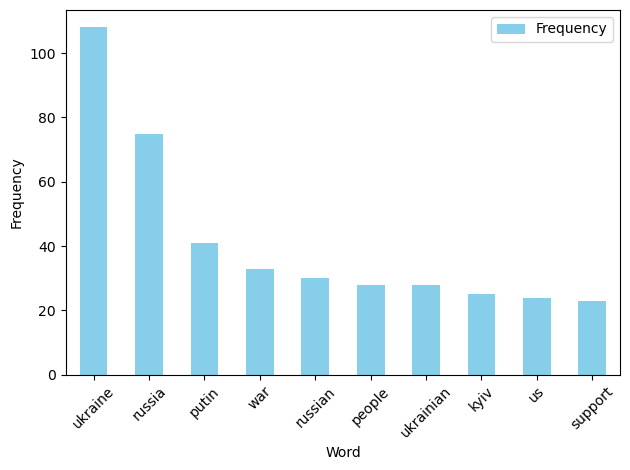

In [5]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

# Load the processed data
data = pd.read_csv('processed_data.csv')

# Convert the 'time' column to datetime format
data['time'] = pd.to_datetime(data['time'])

# Frequency of posts over time
posts_over_time = data.groupby(data['time'].dt.date).size()

# Plot frequency of posts over time
plt.figure(figsize=(12, 6))
posts_over_time.plot(kind='line')
plt.title('Frequency of Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.tight_layout()
plt.savefig('posts_over_time.png')
plt.show()

# Extract keywords or phrases
all_posts = ' '.join(data['clean_post'])
words = re.findall(r'\b\w+\b', all_posts.lower())

# Remove stopwords
stopwords = set(stopwords.words('english'))
words = [word for word in words if word not in stopwords]

# Count frequency of words
word_counts = Counter(words)

# Top 10 most common words
top_words = word_counts.most_common(10)

# Plot top 10 most common words
plt.figure(figsize=(10, 6))
words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
words_df.plot(kind='bar', x='Word', y='Frequency', color='skyblue')
# plt.title('Top 10 Most Common Words')
# plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_10_words.png')
plt.show()


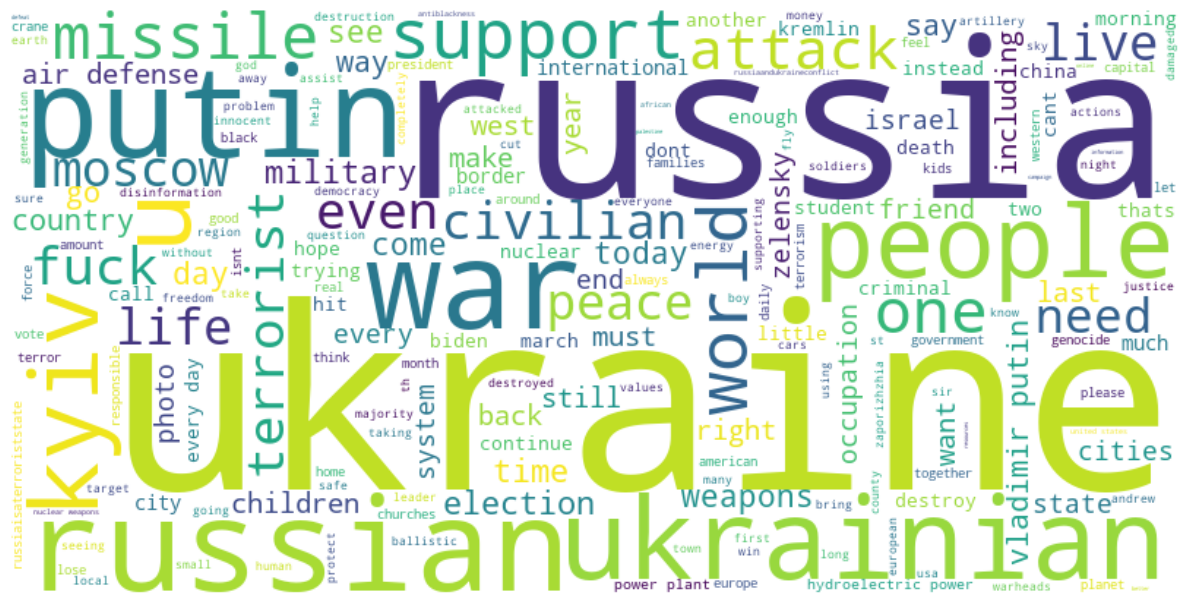

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the processed data
data = pd.read_csv('processed_data.csv')

# Combine all cleaned posts into a single string
all_posts = ' '.join(data['clean_post'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_posts)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')
plt.tight_layout()
plt.savefig('word_cloud.png')
plt.show()


In [7]:
# Define hate speech rules
hate_speech_rules = [
    r'\b(?:hate|kill|attack|discriminate)\b',  # Example keywords associated with hate speech
    r'\b(?:racist|sexist|homophobic)\b',
    # Add more rules as needed
]

# Function to detect hate speech in a given text
def detect_hate_speech(text):
    for rule in hate_speech_rules:
        if re.search(rule, text, re.IGNORECASE):
            return True
    return False

# Apply hate speech detection to each post
data['is_hate_speech'] = data['clean_post'].apply(detect_hate_speech)

# Display posts flagged as hate speech
hate_speech_posts = data[data['is_hate_speech']]
print(hate_speech_posts)



                                                 post       time  \
40  TRAVIS LEE BAILEY, ESQ. American in Moscow Rus...  2024/3/23   
41  Who is gonna say it? 🗣️\n"This attack did not ...  2024/3/22   
43  TRAVIS LEE BAILEY, ESQ. American in Moscow Rus...  2024/3/23   
48  YOU ARE THE MAIN PROBLEM, CAUSING WARS, MISERY...   2024/3/1   
55  tell putin the answer to his question is im in...  2024/3/11   
63  Another sleepless night and morning for us in ...  2024/3/21   
66  After my little escape to the Obedience world ...  2024/3/21   
68  Kyiv today- another morning under ballistic mi...  2024/3/25   
73  Today I burst into tears like a helpless b*tch...  2024/3/22   
74  Overnight, Russia launched an attack on Ukrain...  2024/3/22   
76  russia continues the terror in Ukrainian citie...  2024/3/24   
77  On March 22, Russia carried out the largest at...  2024/3/22   
79  Overnight, Russia launched an attack on Ukrain...  2024/3/22   
85  A view of the crisis at the Russian/Ukraine 

In [8]:
# Save processed data
hate_speech_posts.to_csv('hate_speech_posts.csv', index=False)

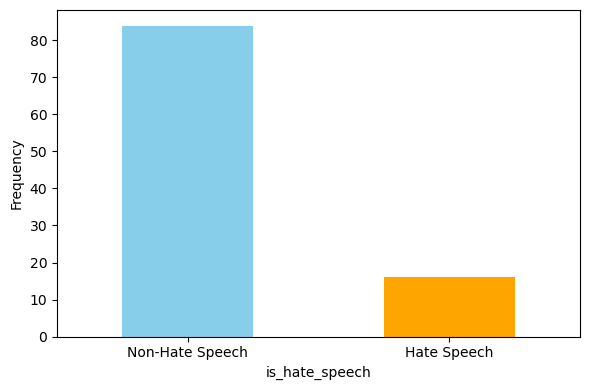

In [9]:
import matplotlib.pyplot as plt

# Count the frequencies of hate speech and non-hate speech posts
hate_speech_counts = data['is_hate_speech'].value_counts()

# Plot the frequencies
plt.figure(figsize=(6, 4))
hate_speech_counts.plot(kind='bar', color=['skyblue', 'orange'])
# plt.title('Hate Speech Detection Results')
# plt.xlabel('Hate Speech')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Non-Hate Speech', 'Hate Speech'], rotation=0)
plt.tight_layout()
plt.savefig('hate_speech_results.png')
plt.show()


In [10]:
# Define rules for adult content
adult_content_rules = [
    r'\b(?:adult|explicit|nsfw)\b',  # Example keywords associated with adult content
    r'\b(?:18\+|21\+|xxx)\b',
    # Add more rules as needed
]

# Function to detect adult content in a given text
def detect_adult_content(text):
    for rule in adult_content_rules:
        if re.search(rule, text, re.IGNORECASE):
            return True
    return False

# Apply adult content detection to each post
data['is_adult_content'] = data['clean_post'].apply(detect_adult_content)

# Display posts flagged as adult content
adult_content_posts = data[data['is_adult_content']]
print(adult_content_posts)


                                                 post       time  \
63  Another sleepless night and morning for us in ...  2024/3/21   

                                           clean_post  sentiment  \
63  another sleepless night morning us kyiv terror...    -0.9819   

   sentiment_class  is_hate_speech  is_adult_content  
63        Negative            True              True  


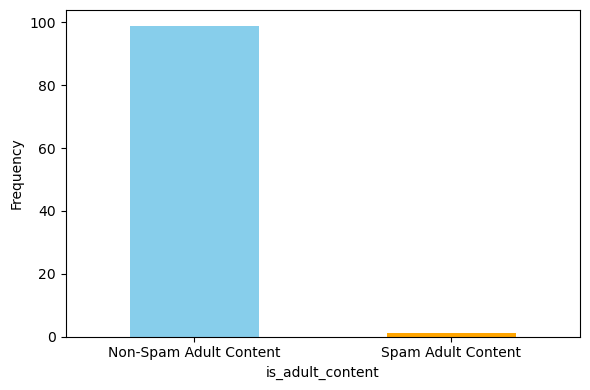

In [11]:
import matplotlib.pyplot as plt

# Count the frequencies of adult content and non-adult content posts
adult_content_counts = data['is_adult_content'].value_counts()

# Plot the frequencies
plt.figure(figsize=(6, 4))
adult_content_counts.plot(kind='bar', color=['skyblue', 'orange'])
# plt.title('Spam Adult Content Detection Results')
# plt.xlabel('Spam Adult Content')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Non-Spam Adult Content', 'Spam Adult Content'], rotation=0)
plt.tight_layout()
plt.savefig('spam_adult_content_results.png')
plt.show()


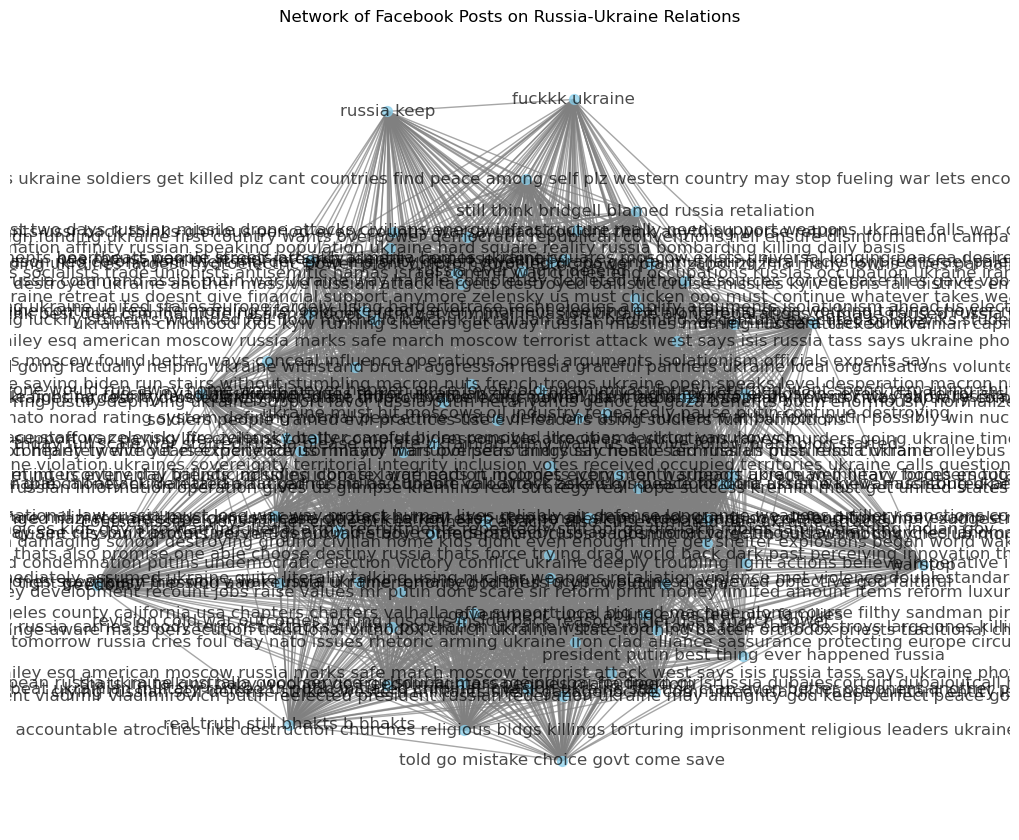

In [15]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Load the processed data
data = pd.read_csv('processed_data.csv')

# Data preprocessing
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Construct network
G = nx.Graph()
for idx, post in data.iterrows():
    G.add_node(post['clean_post'], text=post['clean_post'])

# Add edges based on shared keywords
for i in range(len(data)):
    for j in range(i+1, len(data)):
        common_words = set(preprocess_text(data['clean_post'][i])).intersection(set(preprocess_text(data['clean_post'][j])))
        if len(common_words) > 0:
            G.add_edge(data['clean_post'][i], data['clean_post'][j], weight=len(common_words))

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)

# Apply community detection algorithms
communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)

# Visualize network
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.15)
nx.draw(G, pos, with_labels=True, node_size=50, node_color='skyblue', alpha=0.7, edge_color='gray')
plt.title('Network of Facebook Posts on Russia-Ukraine Relations')
plt.show()



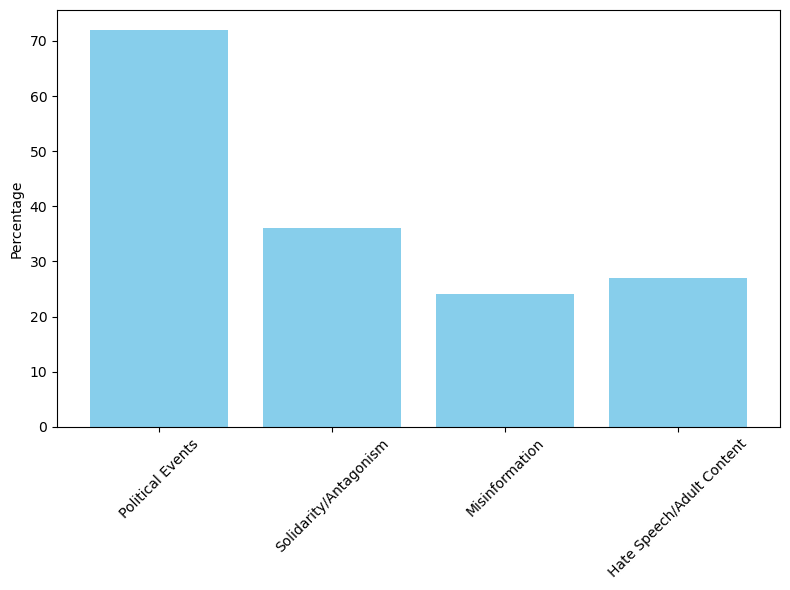

In [18]:
import matplotlib.pyplot as plt

# Data
categories = ['Political Events', 'Solidarity/Antagonism', 'Misinformation', 'Hate Speech/Adult Content']
percentages = [72, 36, 24, 27]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color='skyblue')

plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()

# Save and display plot
plt.savefig('content_category_distribution.png')
plt.show()



In [1]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt

# Download NLTK data files
nltk.download('vader_lexicon')

# Load the dataset
data = pd.read_csv('RU_qualiquanti.csv')

# Data preprocessing
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

data['clean_post'] = data['post'].apply(preprocess_text)
data

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/weichen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,post,political events,expressions of solidarity or antagonism,dissemination of misinformation,presence of hate speech or adult content,clean_post
0,Marching in London today. End Israel’s occupat...,1,1,0,0,marching london today end israels occupation p...
1,Russia invading Ukraine!,1,0,0,0,russia invading ukraine
2,Russia Amps Up Online Campaign Against Ukraine...,1,0,0,0,russia amps online campaign ukraine us electio...
3,"""Russia cannot defeat Ukraine or the West - an...",1,1,1,0,russia defeat ukraine west likely lose west mo...
4,Ukraine will retreat if the US doesn’t give fi...,1,1,0,0,ukraine retreat us doesnt give financial suppo...
...,...,...,...,...,...,...
95,We will win this,1,1,0,0,win
96,No peace to ukraine,1,1,1,1,peace ukraine
97,This is how Russia is planning to attack Ukrai...,1,0,0,0,russia planning attack ukraine using people ki...
98,This is so scary watching this I can’t imagine...,1,0,0,0,scary watching cant imagine people ukraine fee...


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/weichen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


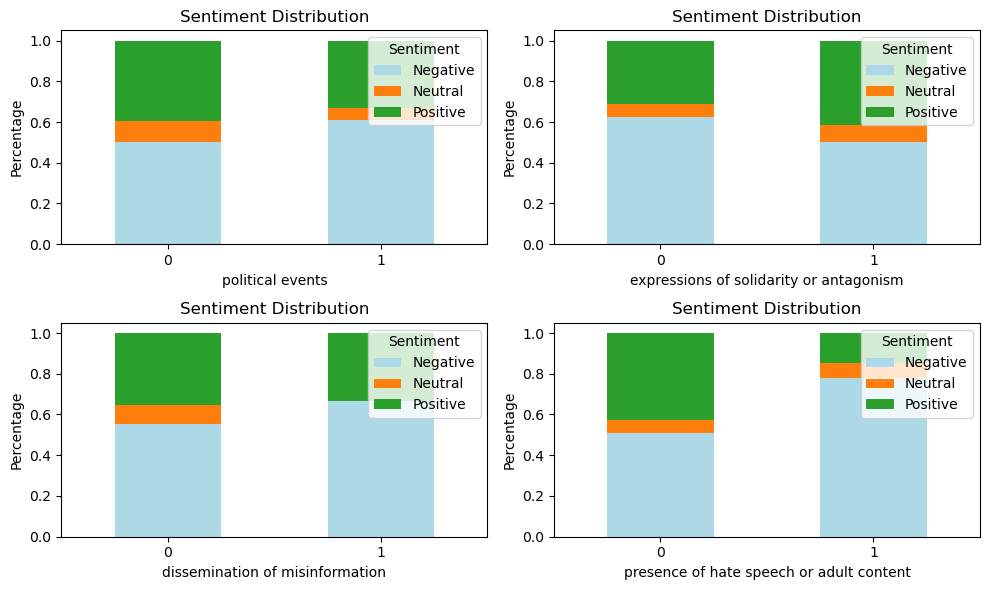

In [9]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt

# Download NLTK data files
nltk.download('vader_lexicon')

# Load the dataset
data = pd.read_csv('RU_qualiquanti.csv')

# Data preprocessing
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

data['clean_post'] = data['post'].apply(preprocess_text)

# Sentiment analysis
sid = SentimentIntensityAnalyzer()
data['sentiment'] = data['clean_post'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Classify sentiment as positive, negative, or neutral
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment_class'] = data['sentiment'].apply(classify_sentiment)

# Aggregate sentiment percentages for each category
sentiment_percentages = {}
categories = ['political events', 'expressions of solidarity or antagonism', 'dissemination of misinformation', 'presence of hate speech or adult content']

for category in categories:
    sentiment_distribution = data.groupby(category)['sentiment_class'].value_counts(normalize=True).unstack()
    sentiment_percentages[category] = sentiment_distribution

# Plot all categories in one figure
plt.figure(figsize=(10, 6))

colors = ['#ADD8E6', '#ff7f0e', '#2ca02c']  # Light blue for Negative, Orange for Positive, Green for Neutral


for i, category in enumerate(categories, start=1):
    ax = plt.subplot(2, 2, i)
    sentiment_percentages[category].plot(kind='bar', stacked=True, ax=ax, color=colors)
    plt.xlabel(category)
    plt.ylabel('Percentage')
    plt.title('Sentiment Distribution')
    plt.xticks(rotation=0)
    plt.legend(title='Sentiment', loc='upper right')

plt.tight_layout()
plt.show()
